In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import warnings

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Notebook configurations
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

In [4]:
house_df = pd.read_csv('../Data/AmesHousing.csv')

In [5]:
house_df.shape

(2930, 82)

In [7]:
house_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:

house_df.shape

(2930, 82)

In [9]:
house_df.Order.value_counts()

2049    1
2530    1
2532    1
485     1
2534    1
       ..
1076    1
1078    1
1080    1
1082    1
2047    1
Name: Order, Length: 2930, dtype: int64

In [11]:
house_df.Order.nunique()



2930

In [13]:


#house_df.drop(['Order', 'PID'], axis=1, inplace=True)
house_df = house_df.drop(['Order', 'PID'], axis=1)
#axis = 1 is for columns

## EDA

In [14]:
house_df.shape

(2930, 80)

In [15]:
house_df.columns.tolist()

['MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qu

In [16]:
house_df.reindex(sorted(house_df.columns), axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
1st Flr SF,2930.0,1159.557679,391.890885,334.0,876.25,1084.0,1384.00,5095.0
2nd Flr SF,2930.0,335.455973,428.395715,0.0,0.00,0.0,703.75,2065.0
3Ssn Porch,2930.0,2.592491,25.141331,0.0,0.00,0.0,0.00,508.0
Bedroom AbvGr,2930.0,2.854266,0.827731,0.0,2.00,3.0,3.00,8.0
Bsmt Full Bath,2928.0,0.431352,0.524820,0.0,0.00,0.0,1.00,3.0
Bsmt Half Bath,2928.0,0.061134,0.245254,0.0,0.00,0.0,0.00,2.0
Bsmt Unf SF,2929.0,559.262547,439.494153,0.0,219.00,466.0,802.00,2336.0
BsmtFin SF 1,2929.0,442.629566,455.590839,0.0,0.00,370.0,734.00,5644.0
BsmtFin SF 2,2929.0,49.722431,169.168476,0.0,0.00,0.0,0.00,1526.0
Enclosed Porch,2930.0,23.011604,64.139059,0.0,0.00,0.0,0.00,1012.0


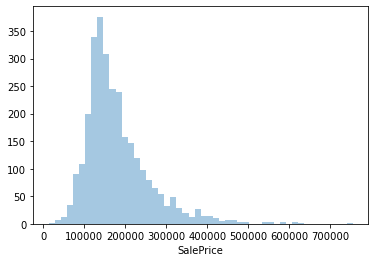

In [19]:
# Observe the SalePrice as this seems to be quite interesting variable for your model
sns.distplot(
    house_df['SalePrice'],
    kde=False,
)
plt.show()

Let´s look at the SalePrice distribution using different types of plots.



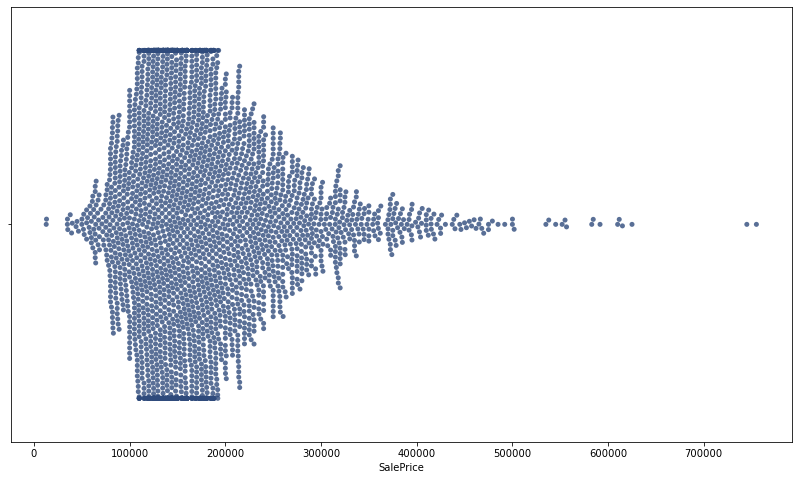

In [20]:

_, ax = plt.subplots(figsize=(14,8))

sns.swarmplot(
    house_df['SalePrice'],
    color='#2f4b7c',
    alpha=0.8,
    ax=ax
)

plt.show()

By looking at the histogram and swarm plot above, we can see that for most units, the sale price ranges from \\$100.000 to \\$200.000.

Let's observe some statistics metrics by using the `method describe` on top of `SalePrice` column

In [21]:
house_df['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [22]:


house_df['SalePrice'].describe().apply(lambda x: '{:,.1f}'.format(x))

count      2,930.0
mean     180,796.1
std       79,886.7
min       12,789.0
25%      129,500.0
50%      160,000.0
75%      213,500.0
max      755,000.0
Name: SalePrice, dtype: object

**From here, we know that**
- The average sale price is \\$180.796
- The minimum sale price is \\$12.789
- The maximum sale price is \\$755.000

**Let's see how predictor variables in our data correlate with the target SalePrice.**

We will calculate these correlation values using Pearson's method and then visualize the correlations using a heatmap


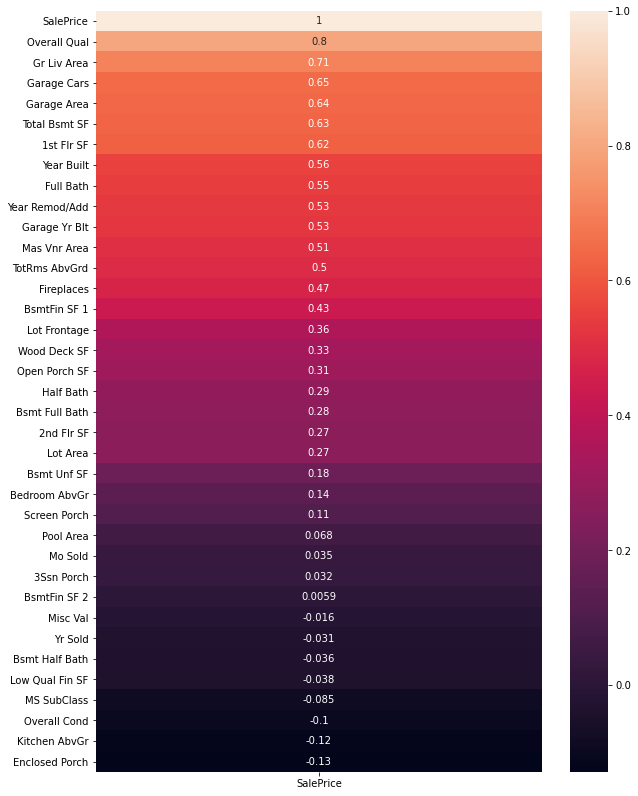

In [23]:
_, ax = plt.subplots(figsize=(10,14))

# If you add more columns next to SalePrice you'll also have correlation for those columns
saleprice_corr = house_df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

sns.heatmap(saleprice_corr, annot=True, ax=ax)

plt.show()

- Lighter colors in the map indicate higher positive correlation values; and 
- Darker colors indicate lower positive correlation values and sometimes negative correlation values

The SalePrice variable has a 1:1 correlation with itself. Though, there are some other variables that are highly correlated with the SalePrice that we can draw some conclusions from.

For example, we can see that `SalePrice is highly correlated with the Overall Qual variable` which describes the overall quality of material and finish of the house. We can also see a `high correlation with Gr Liv Area` which specifies the above-ground living area of the unit.

#### Now that we have some variables that are highly correlated with SalePrice in mind, let's examine the correlations more deeply.

Some variables are highly correlated with the SalePrice, and some aren't. By checking these out, we can draw conclusions on what's prioritized when people are buying properties.

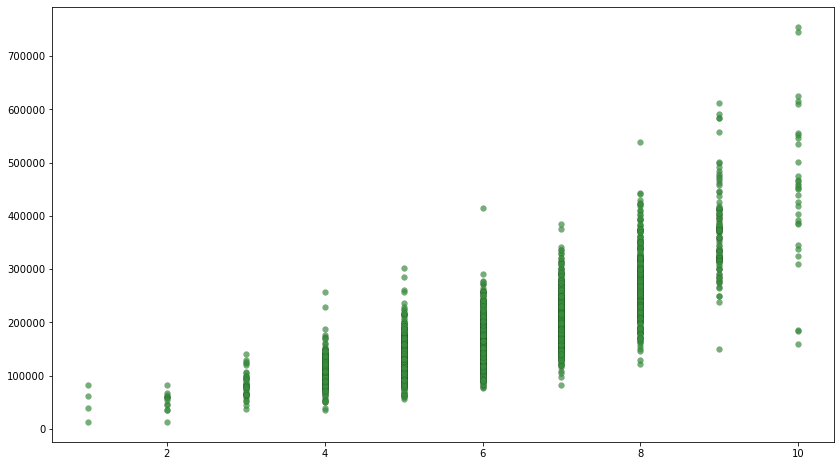

In [24]:
_, ax = plt.subplots(figsize=(14,8))

ax.scatter(
    x=house_df['Overall Qual'],
    y=house_df['SalePrice'], 
    color="#388e3c",
    edgecolors="#000000",
    linewidths=0.1,
    alpha=0.7
)

plt.show()

We can clearly see that as the overall quality increases, the house sale price tends to increase as well.

The increase isn't quite linear, but if we drew a trendline, it would be relatively close to linear.

#### Now, let's see how Gr Liv Area and SalePrice relate to each other with another scatter plot

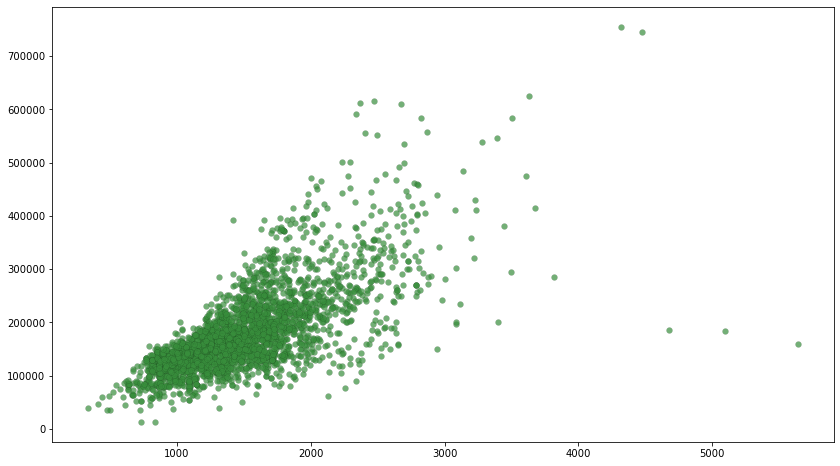

In [25]:
_, ax = plt.subplots(figsize=(14,8))

ax.scatter(
    x=house_df['Gr Liv Area'],
    y=house_df['SalePrice'],
    color="#388e3c",
    edgecolors="#000000",
    linewidths=0.1,
    alpha=0.7
)

plt.show()

Again, we can clearly see the high positive correlation between Gr Liv Area and SalePrice in this scatter plot.

They tend to increase with each other, with a few outliers.

Next, let's look at variables that have a `moderate positive correlation with SalePrice`.

We will look at **Lot Frontage which has a correlation value of 0.36** and **Full Bath which has a correlation value of 0.55**

- Lot Frontage represents the length of the lot in front of the house, all the way to the street
- Full Bath represents the number of full bathrooms above ground.

Similar to what we have done with Overall Qual and Gr Liv Area, we will plot two scatter plots to visualize the relationships between these variables and the SalePrice.

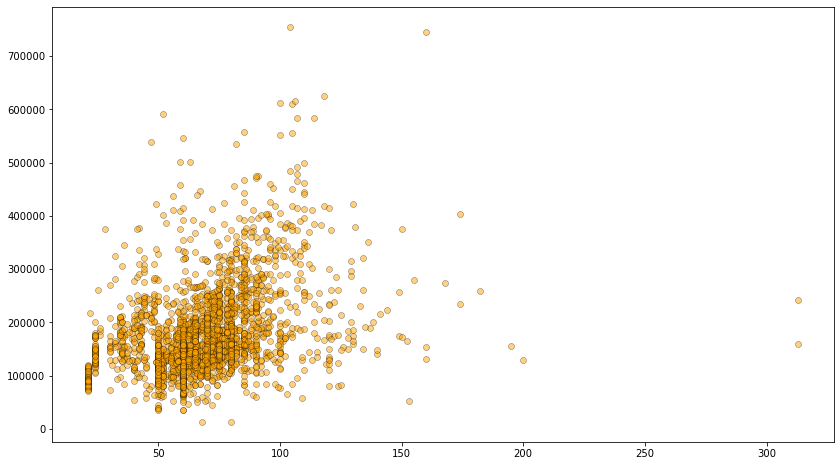

In [26]:
_, ax = plt.subplots(figsize=(14,8))

ax.scatter(
    x=house_df['Lot Frontage'],
    y=house_df['SalePrice'],
    color="orange",
    edgecolors="#000000",
    linewidths=0.5,
    alpha=0.5
)

plt.show()

Here, we can see a much weaker correlation. Even with larger lots in front of the properties, the price doesn't go up by much.

There is a positive correlation between the two, but it doesn't seem to be as important to buyers as some other variables.

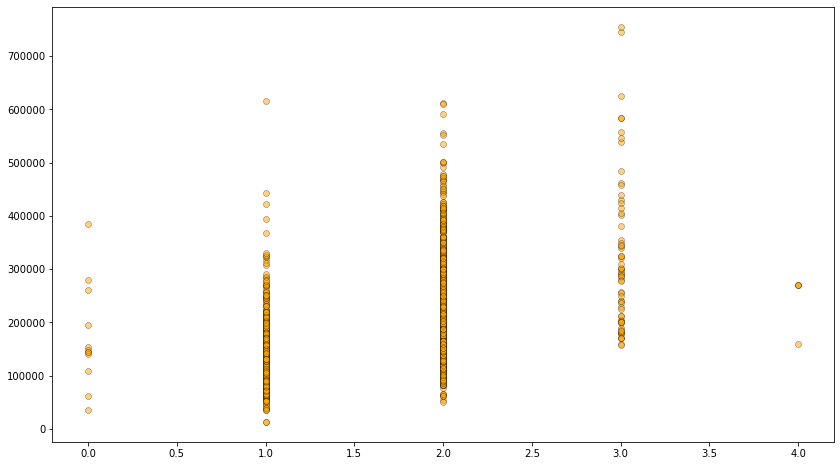

In [27]:
_, ax = plt.subplots(figsize=(14,8))

ax.scatter(
    x=house_df['Full Bath'],
    y=house_df['SalePrice'],
    color="orange",
    edgecolors="#000000",
    linewidths=0.5,
    alpha=0.5
)

plt.show()

Here, we can also see a positive correlation, which isn't that weak, but also isn't too strong.

A good portion of houses with two full bathrooms have the exact same price as the houses with only one bathroom.

The number of bathrooms does influence the price, but not too much.

Finally, let's look at `variables that have a low positive correlation with SalePrice and compare them with what we saw so far`.

We will look at **Yr Sold which has a correlation value of -0.031** and **Bsmt Unf SF which has a correlation value of 0.18.**

- Yr Sold represents the year in which the house was sold
- Bsmt Unf SF represents the unfinished basement area in square feet.

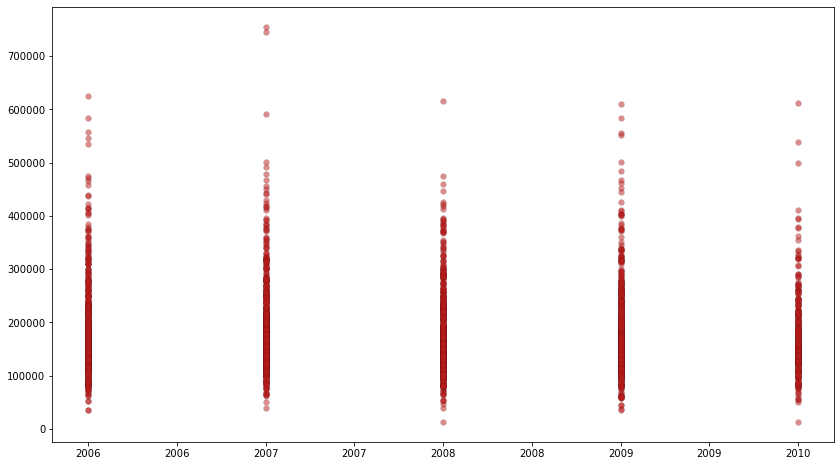

In [28]:
from matplotlib import ticker

_, ax = plt.subplots(figsize=(14,8))
ax.scatter(
    x=house_df['Yr Sold'],
    y=house_df['SalePrice'],
    color="#b71c1c",
    edgecolors="#000000",
    linewidths=0.1,
    alpha=0.5
)

ax.xaxis.set_major_formatter(
  ticker.FuncFormatter(func=lambda x,y: int(x)))
plt.show()

The correlation here is so weak that it's fairly safe to assume that there's basically no correlation between these two variables.

**It's safe to assume that the prices of properties haven't changed much between 2006 and 2010.**

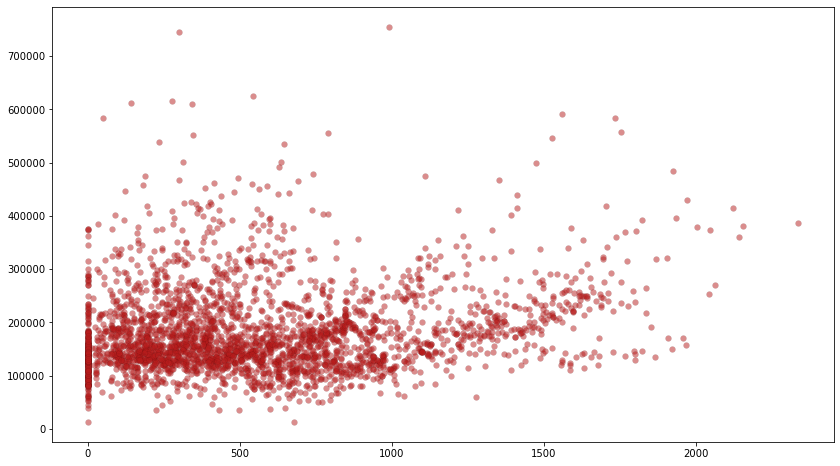

In [29]:
_, ax = plt.subplots(figsize=(14,8))
ax.scatter(
    x=house_df['Bsmt Unf SF'],
    y=house_df['SalePrice'],
    color="#b71c1c",
    edgecolors="#000000",
    linewidths=0.1,
    alpha=0.5
)

plt.show()

Here, we can see some properties with lower Bsmt Unf SF being sold for higher than ones with a high value.

**Then again, this could be due to pure chance, and there isn't an apparent correlation between the two.**
**It's safe to assume that Bsmt Unf SF doesn't have much to do with the SalePrice.**

# Data Preprocessing
    Let´s prepare the data for the model

#### Missing values

In [32]:
house_df.isna().sum()

MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fi

In [30]:
missing_values = pd.DataFrame({
    'Column': house_df.columns.values,
    '# of missing values': house_df.isna().sum().values,
    '% of missing values': 100 * house_df.isna().sum().values / len(house_df),
})

missing_values = missing_values[missing_values['# of missing values'] > 0]

print(
    missing_values.sort_values(
        by='# of missing values',
        ascending=False
    ).reset_index(drop=True))

            Column  # of missing values  % of missing values
0          Pool QC                 2917            99.556314
1     Misc Feature                 2824            96.382253
2            Alley                 2732            93.242321
3            Fence                 2358            80.477816
4     Fireplace Qu                 1422            48.532423
5     Lot Frontage                  490            16.723549
6      Garage Cond                  159             5.426621
7      Garage Qual                  159             5.426621
8    Garage Finish                  159             5.426621
9    Garage Yr Blt                  159             5.426621
10     Garage Type                  157             5.358362
11   Bsmt Exposure                   83             2.832765
12  BsmtFin Type 2                   81             2.764505
13  BsmtFin Type 1                   80             2.730375
14       Bsmt Qual                   80             2.730375
15       Bsmt Cond      

**Pool QC, Misc Feature, Alley, Fence, and Fireplace Qu variables contain a high percentage of missing values** as shown in the table.
- We will simply remove them as they probably won't affect the results much at all

In [31]:
house_df = house_df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis=1)

For other variables that contain missing values, we will replace these missing values depending on the data type of the variable: whether it is numerical or categorical.

In [33]:
cols_with_missing_values = house_df.columns[house_df.isna().sum() > 0]

for col in cols_with_missing_values:
    print(col)
    print(house_df[col].unique()[:5])
    print('*'*30)

Lot Frontage
[141.  80.  81.  93.  74.]
******************************
Mas Vnr Type
['Stone' 'None' 'BrkFace' nan 'BrkCmn']
******************************
Mas Vnr Area
[112.   0. 108.  20. 603.]
******************************
Bsmt Qual
['TA' 'Gd' 'Ex' nan 'Fa']
******************************
Bsmt Cond
['Gd' 'TA' nan 'Po' 'Fa']
******************************
Bsmt Exposure
['Gd' 'No' 'Mn' 'Av' nan]
******************************
BsmtFin Type 1
['BLQ' 'Rec' 'ALQ' 'GLQ' 'Unf']
******************************
BsmtFin SF 1
[ 639.  468.  923. 1065.  791.]
******************************
BsmtFin Type 2
['Unf' 'LwQ' 'BLQ' 'Rec' nan]
******************************
BsmtFin SF 2
[   0.  144. 1120.  163.  168.]
******************************
Bsmt Unf SF
[ 441.  270.  406. 1045.  137.]
******************************
Total Bsmt SF
[1080.  882. 1329. 2110.  928.]
******************************
Electrical
['SBrkr' 'FuseA' 'FuseF' 'FuseP' nan]
******************************
Bsmt Full Bath
[ 1.  0.  2.  3.

#### Let's replace the values of missing numerical values with the mean
    

In [ ]:
num_with_missing = ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 
                    'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 
                    'Garage Yr Blt', 'Garage Cars', 'Garage Area']

for n_col in num_with_missing:
    house_df[n_col] = house_df[n_col].fillna(house_df[n_col].mean())

#### Next, let's replace missing values for categorical variables

In [ ]:
cat_with_missing = [x for x in cols_with_missing_values if x not in num_with_missing]

for c_col in cat_with_missing:
    house_df[c_col] = house_df[c_col].fillna(house_df[c_col].mode().to_numpy()[0])

### One-Hot Encoding of Categorical Variables


Let's check if there are any data type discrepancies in the DataFrame

In [34]:
# datatype object usually contains either noisy data; or text/categorical columns
data_types = pd.DataFrame({
    'Column': house_df.select_dtypes(exclude='object').columns.values,
    'Data type': house_df.select_dtypes(exclude='object').dtypes.values
})

print(data_types)

             Column Data type
0       MS SubClass     int64
1      Lot Frontage   float64
2          Lot Area     int64
3      Overall Qual     int64
4      Overall Cond     int64
5        Year Built     int64
6    Year Remod/Add     int64
7      Mas Vnr Area   float64
8      BsmtFin SF 1   float64
9      BsmtFin SF 2   float64
10      Bsmt Unf SF   float64
11    Total Bsmt SF   float64
12       1st Flr SF     int64
13       2nd Flr SF     int64
14  Low Qual Fin SF     int64
15      Gr Liv Area     int64
16   Bsmt Full Bath   float64
17   Bsmt Half Bath   float64
18        Full Bath     int64
19        Half Bath     int64
20    Bedroom AbvGr     int64
21    Kitchen AbvGr     int64
22    TotRms AbvGrd     int64
23       Fireplaces     int64
24    Garage Yr Blt   float64
25      Garage Cars   float64
26      Garage Area   float64
27     Wood Deck SF     int64
28    Open Porch SF     int64
29   Enclosed Porch     int64
30       3Ssn Porch     int64
31     Screen Porch     int64
32        

#### Based on this table and the variables descriptions from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data), we can notice which variables were falsely considered numerical by Pandas.
    For example, MS SubClass was detected as a numerical variable with a data type of int64. However, based on the description of this variable, it specifies the type of the unit being sold.

In [35]:
# Let's have a look
house_df['MS SubClass'].unique().tolist()

[20, 60, 120, 50, 85, 160, 80, 30, 90, 190, 45, 70, 75, 40, 180, 150]

This variable represent different unit types as numbers like 20 (one story dwellings built in 1946 and newer), 60 (2 story dwellings built in 1946 and newer), etc.

#### Performing One-Hot Encoding
    Before performing One-Hot Encoding, we want to select a subset of the features from our data to use from now on. We'll want to do so because our dataset contains 2,930 records and 75 features.
    
    Many of these features are categorical. So if we keep all the features and perform One-Hot Encoding, the resulting number of features will be large and the model might suffer from the curse of dimensionality as a result.

**Let's make a list of the variables we want to keep in a subset and trim the DataFrame so we only use these**

In [36]:
selected_vars = ['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
                 'Neighborhood', 'Overall Qual', 'Overall Cond',
                 'Year Built', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
                 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 
                 'Kitchen AbvGr', 'TotRms AbvGrd', 'Garage Area', 
                 'Pool Area', 'SalePrice']

house_df = house_df[selected_vars]

In [37]:
house_df = pd.get_dummies(house_df)

After one-hot encoding, the dataset will have 67 variables. Here are the capped first few rows - there are many more variables than this

In [38]:
house_df.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Garage Area,Pool Area,SalePrice,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,20,141.0,31770,6,5,1960,1080.0,1656,0,1656,1,0,3,1,7,528.0,0,215000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,20,80.0,11622,5,6,1961,882.0,896,0,896,1,0,2,1,5,730.0,0,105000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,20,81.0,14267,6,6,1958,1329.0,1329,0,1329,1,1,3,1,6,312.0,0,172000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,20,93.0,11160,7,5,1968,2110.0,2110,0,2110,2,1,3,1,8,522.0,0,244000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,60,74.0,13830,5,5,1997,928.0,928,701,1629,2,1,3,1,6,482.0,0,189900,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Splitting Data into Training and Testing Sets



In [39]:
# random_state --> if used makes it reproducible using for example 0.8 (80% of my data)
train_df = house_df.sample(frac=0.8, random_state=9)
test_df = house_df.drop(train_df.index)

train_labels = train_df.pop('SalePrice')
test_labels = test_df.pop('SalePrice')
#you can also do test_df.SalePrice and not put pop

In [40]:
print(train_df.shape)
print(test_df.shape)

print(train_labels.shape)
print(test_labels.shape)

(2344, 52)
(586, 52)
(2344,)
(586,)


### Data Scaling: Standardization

In [41]:

predictor_vars = train_df.columns

for col in predictor_vars:
    # Calculating variable mean and std from training data
    col_mean = train_df[col].mean()
    col_std = train_df[col].std()
    if col_std == 0:
        col_std = 1e-20
    train_df[col] = (train_df[col] - col_mean) / col_std
    test_df[col] = (test_df[col] - col_mean) / col_std    

## Defining the Model
 

#### Defining the model can be broken down into a few characteristics:
    Number of Layers
    Types of these Layers
    Number of units (neurons) in each Layer
    Activation Functions of each Layer
    Input and output size

In [42]:
# Remember your input data, and get the number of features for your input layer based on that
print(train_df.shape)
print(train_df.shape[1])

(2344, 52)
52


In [43]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[train_df.shape[1]]),
    layers.Dropout(0.3, seed=2),
    
    layers.Dense(64, activation='swish'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='swish'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='swish'),
    
    layers.Dense(1)
])

### Configure the loss function and optimizer before fitting the model

In [44]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=optimizer,
    metrics=['mae']
)
#Mean average error for metric as the target variable is numerical and typical regression problem

Here, we've created an RMSprop optimizer, with a learning rate of 0.001. 

## Training the model



In [45]:
history = model.fit(
    train_df,
    train_labels,
    epochs=70,
    validation_split=0.2
)

Epoch 1/70
59/59 [==============================] - 5s 31ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/70
59/59 [==============================] - 1s 10ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/70
59/59 [==============================] - 1s 12ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/70
59/59 [==============================] - 1s 14ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/70
59/59 [==============================] - 1s 14ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/70
59/59 [==============================] - 1s 11ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/70
59/59 [==============================] - 1s 11ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/70
59/59 [==============================] - 1s 9ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/70
59/59 [==============================]

Epoch 70/70
59/59 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan


#### Before making predictions, let's visualize how the loss value and mae changed over time

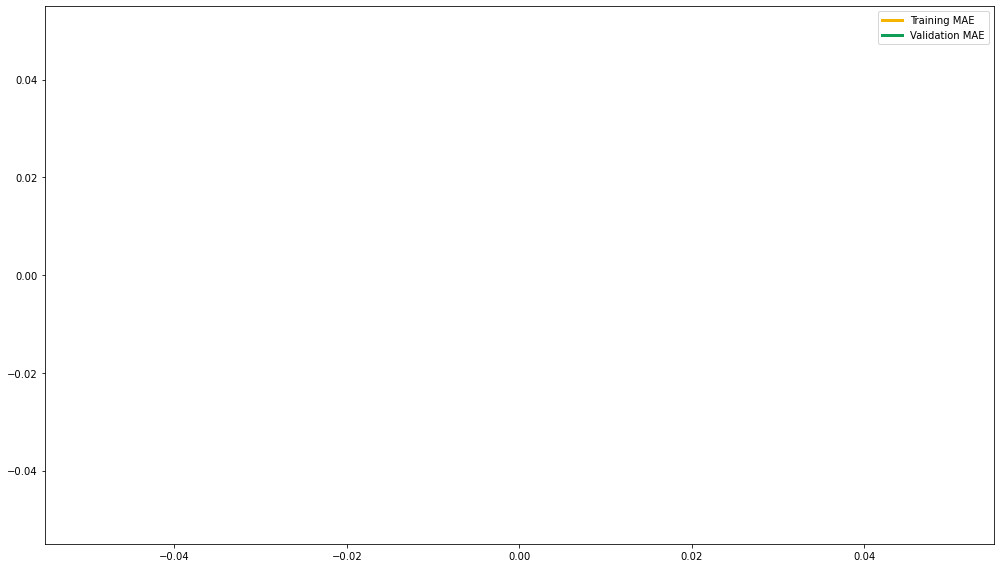

In [46]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

_, ax = plt.subplots(figsize=(14,8))
num_epochs = model_history.shape[0]
ax.plot(
    np.arange(0, num_epochs),
    model_history["mae"],
    label="Training MAE",
    lw=3,
    color='#f4b400'
)

ax.plot(
    np.arange(0, num_epochs),
    model_history["val_mae"],
    label="Validation MAE",
    lw=3,
    color='#0f9d58'
)

ax.legend()
plt.tight_layout()
plt.show()

We can clearly see both the mae and loss values go down over time. 

### Making predictions with the model

In [47]:
test_unit = test_df.iloc[[13]]
test_unit

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Garage Area,Pool Area,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
67,-0.871877,0.947361,-0.120637,0.633261,-0.497636,1.236948,0.368021,0.142937,-0.784028,-0.553685,0.7858,-0.755686,-1.03531,-0.212316,-1.56349,0.932655,-0.065753,-0.029217,-0.087951,4.463191,-0.029217,-0.092748,-1.863277,-0.432847,-0.103807,-0.054718,-0.105886,-0.192749,-0.123092,-0.323378,-0.181769,-0.267875,-0.249096,-0.050648,-0.029217,-0.17925,-0.020655,-0.103807,-0.204353,-0.420275,-0.087951,-0.208841,-0.166156,-0.24325,-0.301166,-0.124865,-0.240285,-0.211055,3.893462,-0.128342,-0.154976,-0.082885


Note: predict() returns a NumPy array so we used `squeeze()`, which is a NumPy function to "squeeze" this array and get the prediction value out of it as a number, not an array.

In [48]:
test_pred = model.predict(test_unit).squeeze()
test_lbl = test_labels.iloc[13]

print("Model prediction = {:.2f}".format(test_pred))
print("Actual value = {:.2f}".format(test_lbl))

Model prediction = nan
Actual value = 204500.00


**So for this unit, the actual price is \\$204,500.00 and the predicted price is \\$210,382.55. Again, not quite on point, but is not that far away from it**

# Evaluating the model

In [49]:
loss, mae = model.evaluate(test_df, test_labels, verbose=0)

In [50]:
print('MAE = {:.2f}'.format(mae))

MAE = nan


#### Interpretation of Model Performance

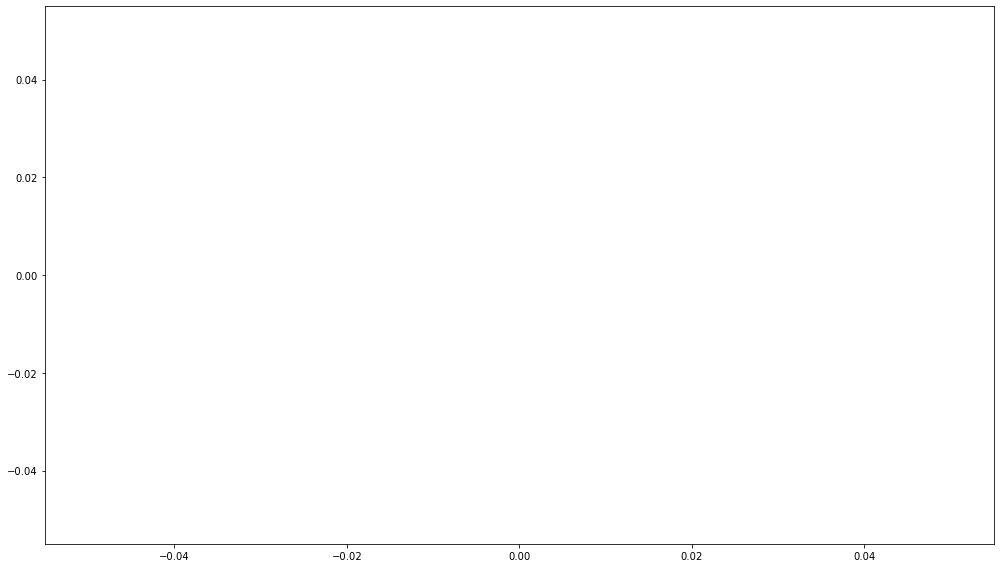

In [51]:
test_predictions_ = model.predict(test_df).flatten()
test_labels_ = test_labels.to_numpy().flatten()

_, ax = plt.subplots(figsize=(14,8))
plt.scatter(
    test_labels_,
    test_predictions_,
    alpha=0.6,
    color='#ff7043',
    lw=1,
    ec='black'
)

lims = [
    0,
    max(test_predictions_.max(), test_labels_.max())
]

plt.plot(lims, lims, lw=1, color='#00acc1')
plt.tight_layout()
plt.show()